In [1]:
import pandas as pd
from ast import literal_eval
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DELTA = 0.7 ## RECOMMENDED
#S = 20*W ## RECOMMENDED

In [3]:
def return_PMI(row):
    fem_PMI = np.log( (row.female) / (P_fem * ((row.female + row.male)/N)))
    mal_PMI = np.log( (row.male) / (P_mal * ((row.female + row.male)/N)))
    return fem_PMI, mal_PMI

In [4]:
def return_cPMI(row): # should P_fem/N and word/W??? Look at more usecases of this in a context.
    fem_cPMI = np.log( row.female/N / (P_fem/N * ((row.female + row.male)/W_adj) + np.sqrt(P_fem) * np.sqrt(np.log(DELTA)/-2)))
    mal_cPMI = np.log( row.male/N / (P_mal/N * ((row.female + row.male)/W_adj) + np.sqrt(P_mal) * np.sqrt(np.log(DELTA)/-2)))
    return fem_cPMI, mal_cPMI

In [5]:
def return_cPMId(row):
    fem_cPMId = np.log( row.female / (Pd_fem * ((row.female + row.male)/D) + np.sqrt(Pd_fem) * np.sqrt(np.log(DELTA)/-2)))
    mal_cPMId = np.log( row.male / (Pd_mal * ((row.female + row.male)/D) + np.sqrt(Pd_mal) * np.sqrt(np.log(DELTA)/-2)))
    return fem_cPMId, mal_cPMId

In [6]:
dfs = []
for file in glob.glob("201*.csv"):
    dfs.append(pd.read_csv(file).drop(columns=["Unnamed: 0"]))

C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df = pd.concat(dfs)

In [8]:
df.dropna(subset=['Verbs_parsed'], inplace=True) # somekind of mistake
df

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,given_name_used,family_name_used,full_name_used,nickname_used,Adjectives,Verbs,Nouns,Descriptors_parsed,Verbs_parsed,Relation
0,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q1124,['Clinton'],NaN,male,white people,United States of America,...,False,True,False,False,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'lot', 'thing', 'b...",[],[],['pobj']
1,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q207,['GWB'],NaN,male,NaN,United States of America,...,False,False,False,True,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'name', 'name', 'n...","['bad', 'that', 'bad', 'that', 'lot', 'only', ...","['be', 'be', 'do', 'elect', 'deregulate']","['dep', 'dep', 'dep', 'nsubjpass', 'appos', 'n..."
2,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,True,False,False,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'lot', 'thing', 'b...","['market', 'great', 'stock']","['bother', 'inherit']","['dep', 'dep']"
3,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q76,"['Obama', 'Neocons']",NaN,male,African Americans,United States of America,...,False,True,False,False,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'lot', 'thing', 'b...","['conservative', 'traditional']",[],"['pobj', 'pobj']"
4,e2r5jsd,I wonder if we’ll see [NAME] cry when [NAME] r...,politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,True,False,False,[],"['wonder', 'see', 'cry', 'realize', 'record']","['name', 'name', 'name']",['when'],"['see', 'realize', 'record']","['dep', 'dep', 'dobj']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820229,ed5nl94,Washington state Democratic caucuses on March ...,democrats,t3,Q359442,['Sanders'],1546531378.0,male,Jewish people,United States of America,...,False,True,False,False,"['democratic', 'democratic']",[],"['state', 'caucus', 'name', '%', '%', 'state',...","['%', 'url', '%', '%']",[],"['ROOT', 'appos']"
820230,ed5nl94,Washington state Democratic caucuses on March ...,democrats,t3,Q6294,['Clinton'],1546531378.0,female,NaN,United States of America,...,False,True,False,False,"['democratic', 'democratic']",[],"['state', 'caucus', '%', 'name', '%', 'state',...","['%', '%', 'primary', 'state', 'democratic', '...",[],"['nmod', 'appos']"
820231,ed5o4y9,[NAME] also said that [NAME] needs a reason to...,democrats,t3,Q170581,['Nancy Pelosi'],1546531809.0,female,Italian American,United States of America,...,False,False,True,False,['political'],"['say', 'need', 'impeach', 'be', 'finish']","['name', 'name', 'reason', 'reason', 'report']","['also', 'reason']","['say', 'need']","['dep', 'nsubj']"
820232,ed5d89v,This shouldn't be ruled out for any president....,democrats,t3,Q22686,['Trump'],1546523198.0,male,NaN,United States of America,...,False,True,False,False,['potential'],"['rule', 'keep', 'pile']","['president', 'name', 'article', 'impeachment']","['article', 'potential']","[""'s""]",['dep']


In [9]:
#df['single_mention'] = df.groupby('id').transform(lambda group: len(group) == 1) # Figure out how to do this

In [10]:
singles = df.groupby('id').filter(lambda group: len(group) == 1) # look only at comments that comment on ONE politician -- easier?

In [11]:
#singles.dropna(subset=['Adjectives'], inplace=True)

In [12]:
singles['Descriptors_parsed'] = singles['Descriptors_parsed'].map(literal_eval)
singles['Verbs_parsed'] = singles['Verbs_parsed'].map(literal_eval)

In [13]:
singles['Descriptors_parsed'] = singles['Descriptors_parsed'].map(set)
singles['Verbs_parsed'] = singles['Verbs_parsed'].map(set)

In [14]:
fem_freq = {}
mal_freq = {}
for doc in singles[singles['sex'] == 'female'].Verbs_parsed:
    for adj in doc: #ensure the same word isn't counted twice
        if adj.lower() in fem_freq.keys():
            fem_freq[adj.lower()] += 1
        else:
            fem_freq[adj.lower()] = 1
            mal_freq[adj.lower()] = 0

for doc in singles[singles['sex'] == 'male'].Verbs_parsed:
    for adj in doc: #ensure the same word isn't counted twice
        if adj.lower() in mal_freq.keys():
            mal_freq[adj.lower() ] += 1
        else:
            mal_freq[adj.lower() ] = 1
            fem_freq[adj.lower() ] = 0

In [15]:
array = pd.DataFrame.from_dict([fem_freq,mal_freq])
array.index = ['female', 'male']

In [16]:
array_T = array.transpose()
array_T = array_T[(array_T.female > 2) & (array_T.male > 2)] # only look at words that appear at least 3 times in both sample sets.

In [17]:
(array_T == 0).sum()

female    0
male      0
dtype: int64

In [18]:
W_adj = sum(singles.Verbs_parsed.map(len))

In [19]:
N = singles.shape[0]
P_fem = singles[singles['sex'] == 'female'].shape[0]
P_mal = singles[singles['sex'] == 'male'].shape[0]

In [20]:
array_T['PMI_female'], array_T['PMI_male'] = zip(*array_T.apply(lambda row: return_PMI(row), axis=1))

In [21]:
array_T['cPMI_female'], array_T['cPMI_male'] = zip(*array_T.apply(lambda row: return_cPMI(row), axis=1))

In [22]:
array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:300]

,female,male,PMI_female,PMI_male,cPMI_female,cPMI_male
alarm,42,9,1.993231,-1.615514,-16.726753,-19.301348
cackle,14,6,1.830712,-1.084885,-17.825365,-19.706813
bleach,10,5,1.781922,-0.979525,-18.161837,-19.889134
coronate,8,5,1.701879,-0.836424,-18.384981,-19.889134
mortify,7,5,1.648390,-0.756381,-18.518512,-19.889134
...,...,...,...,...,...,...
mutter,6,23,0.611851,-0.112714,-18.672663,-18.363078
groom,44,169,0.610284,-0.112306,-16.680233,-16.368673
rescind,26,101,0.601296,-0.109979,-17.206326,-16.883452
slur,12,47,0.594756,-0.108302,-17.979516,-17.648424


In [23]:
array_T.sort_values(by=['PMI_male'], axis=0, ascending=False).iloc[:300]

,female,male,PMI_female,PMI_male,cPMI_female,cPMI_male
pardon,37,4026,-2.511372,0.109939,-16.853505,-13.198045
veto,12,961,-2.208091,0.106678,-17.979516,-14.630598
override,5,343,-2.055378,0.104616,-18.854985,-15.660842
invade,7,443,-1.975951,0.103410,-18.518512,-15.405002
normalize,4,244,-1.939748,0.102827,-19.078128,-16.001404
...,...,...,...,...,...,...
lie,1078,16038,-0.577519,0.054035,-13.481562,-11.815863
manipulate,36,535,-0.576483,0.053965,-16.880904,-15.216306
panic,7,104,-0.576233,0.053948,-18.518512,-16.854181
starve,6,89,-0.574731,0.053847,-18.672663,-17.009936


In [20]:
#array_T.sort_values(by=['cPMI_male'], axis=0, ascending=False).iloc[:200]
#(array_T['cPMI_female'] - array_T['cPMI_male']).sort_values(ascending=False).iloc[:200]

In [28]:
singles['Verbs_parsed'] = singles['Verbs_parsed'].map(list)

In [24]:
entity_level = singles.groupby('NEL').agg({'Verbs_parsed': list})
entity_level['Verbs_parsed'] = entity_level['Verbs_parsed'].apply(lambda x: [item for sublist in x for item in sublist])
entity_level['Verbs_parsed'] = entity_level['Verbs_parsed'].map(set)

In [25]:
mapper = singles[['NEL','sex']].drop_duplicates('NEL').set_index('NEL').to_dict()['sex']
entity_level['sex'] = entity_level.index.map(mapper)

In [26]:
d_fem_freq = {}
d_mal_freq = {}
for ent in entity_level[entity_level['sex'] == 'female'].Verbs_parsed:
    for adj in ent: #ensure the same word isn't counted twice
        if adj.lower() in d_fem_freq.keys():
            d_fem_freq[adj.lower()] += 1
        else:
            d_fem_freq[adj.lower()] = 1
            d_mal_freq[adj.lower()] = 0

for ent in entity_level[entity_level['sex'] == 'male'].Verbs_parsed:
    for adj in ent: #ensure the same word isn't counted twice
        if adj.lower() in d_mal_freq.keys():
            d_mal_freq[adj.lower() ] += 1
        else:
            d_mal_freq[adj.lower() ] = 1
            d_fem_freq[adj.lower() ] = 0

In [27]:
D = entity_level.shape[0]
Pd_fem = entity_level[entity_level['sex'] == 'female'].shape[0]
Pd_mal = entity_level[entity_level['sex'] == 'male'].shape[0]

In [28]:
d_array = pd.DataFrame.from_dict([d_fem_freq,d_mal_freq])
d_array.index = ['female', 'male']
d_array_T = d_array.transpose()
d_array_T = d_array_T[(d_array_T.female > 2) & (d_array_T.male > 2)] # only look at words that appear at least 3 times in both sample sets.

In [29]:
d_array_T['PMI_female'], d_array_T['PMI_male'] = zip(*d_array_T.apply(lambda row: return_PMI(row), axis=1))

In [30]:
d_array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:300]

,female,male,PMI_female,PMI_male
cosponsor,11,7,1.694910,-0.825374
spurn,7,5,1.648390,-0.756381
iron,4,3,1.627771,-0.728210
decorate,4,3,1.627771,-0.728210
scorn,5,5,1.494240,-0.574060
...,...,...,...,...
flinch,4,10,0.934624,-0.217385
slurp,4,10,0.934624,-0.217385
attract,16,40,0.934624,-0.217385
congratulate,15,38,0.925145,-0.213618


In [31]:
d_array_T.sort_values(by=['PMI_male'], axis=0, ascending=False).iloc[:300]

,female,male,PMI_female,PMI_male
sentence,5,79,-0.633992,0.057719
jerk,3,45,-0.585202,0.054549
dismantle,4,55,-0.503856,0.048883
credit,4,52,-0.451670,0.044980
gather,3,36,-0.377562,0.039045
...,...,...,...,...
squirm,4,22,0.315585,-0.047967
recommend,19,104,0.319641,-0.048706
die,51,279,0.320120,-0.048793
rot,11,60,0.322602,-0.049248


In [32]:
most_fem_c = d_array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:300]
least_fem_c = d_array_T.sort_values(by=['PMI_female'], axis=0).iloc[:300]

In [33]:
most_female = array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:200]
least_female = array_T.sort_values(by=['PMI_female'], axis=0).iloc[:200]

In [36]:
for word in least_fem_c.index:
    print(word)

sentence
jerk
dismantle
credit
gather
obstruct
observe
purchase
invade
railroad
bankroll
kidnap
detain
reform
misread
aid
overturn
torture
evaluate
neuter
whisper
overrule
expel
train
initiate
bar
evade
override
photograph
indict
pardon
fulfil
assist
purge
emulate
chant
scrap
capitulate
revere
fellate
discourage
jack
wave
separate
kid
plead
pause
activate
rebuild
cultivate
filibuster
obsess
normalize
engineer
haul
restrict
slither
dip
transfer
craft
strengthen
overthrow
veto
bust
invent
sweat
march
mourn
wander
award
soften
kneel
facilitate
legalize
align
tip
govern
warn
shuffle
drug
commission
renege
pour
buckle
stamp
masturbate
shed
orchestrate
crawl
stack
preserve
funnel
reinstate
plot
reign
prohibit
whitewash
berate
deride
discover
testify
lobby
poison
implicate
flee
distract
charge
rewrite
insulate
disband
escalate
censor
halt
hinder
issue
flirt
snort
assert
film
abolish
slaughter
contest
characterize
instruct
consume
creep
stroke
attach
postpone
acquit
exercise
eject
extend
lectu

In [35]:
for word in most_fem_c.index:
    print(word)

cosponsor
spurn
iron
decorate
scorn
hone
flatter
overtake
embellish
impregnate
satirize
inundate
inch
coronate
bout
pamper
ferry
gaze
spotlight
reestablish
immortalize
entail
usurp
pair
strive
field
cackle
dab
sharpen
vomit
puke
wall
enhance
outpace
checkmate
swindle
plunder
spark
underperform
disdain
glare
sexualize
hawk
naturalize
cram
ace
muscle
shush
prostitute
boofe
poach
juxtapose
flunk
dry
frighten
beam
blurt
amplify
overstay
skirt
misspeak
punke
trace
shag
reposte
clothe
axe
accommodate
rake
besmirch
flick
dog
fumble
had
gonna
dwindle
incur
traumatize
skin
indite
enlighten
conceede
overperforme
exude
sneer
pet
license
shorten
annoy
bleach
overpower
nitpick
class
procure
villifie
mow
boof
rejoin
hoard
wise
beto
doctor
whore
further
differentiate
fundraise
equal
retweet
salvage
blaze
barge
redirect
foil
isn't
wrong
clobber
soil
castigate
except
nullify
overhear
flub
snatch
persist
chair
mail
lump
encounter
unify
widen
conform
tag
twitter
trumpet
fork
shriek
drape
bake
wrestle
rac

# Super senses

In [37]:
dics = []
for file in glob.glob("adj-supersenses/manual_annotations/*.txt"):
    tag = file[44:-4]
    with open(file) as f:
        l = f.readlines()
        l = [word[:-1] for word in l]
        dics.append(pd.Series({word: tag for word in l}))
senses = pd.concat(dics)
senses.name = 'Senses'

In [39]:
most_fem_c.merge(senses, left_index=True, right_index=True)['Senses'].value_counts()

substance        3
mind             1
weather          1
miscellaneous    1
Name: Senses, dtype: int64

In [40]:
least_fem_c.merge(senses, left_index=True, right_index=True)['Senses'].value_counts()

temporal      3
substance     2
weather       1
perception    1
spatial       1
Name: Senses, dtype: int64

# NRC Lexica

In [41]:
emotions = pd.read_csv("nrc_lexica/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",names=["word", "emotion", "association"], sep="\t")

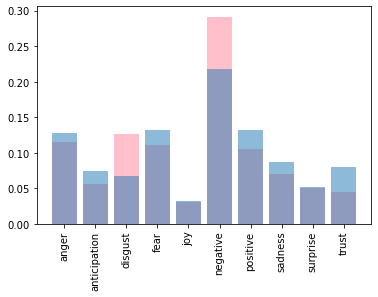

In [42]:
fem_emotions = {}
for word in emotions.emotion.unique():
    fem_emotions[word] = 0
mal_emotions = {}
for word in emotions.emotion.unique():
    mal_emotions[word] = 0
    
for word in most_fem_c.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        fem_emotions[emotion] += 1
for word in least_fem_c.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        mal_emotions[emotion] += 1

male_sum = sum(list(mal_emotions.values()))
fem_sum = sum(list(fem_emotions.values()))

plt.bar(fem_emotions.keys(), np.array(list(fem_emotions.values()))/fem_sum, color='pink')
plt.bar(mal_emotions.keys(), np.array(list(mal_emotions.values()))/male_sum, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

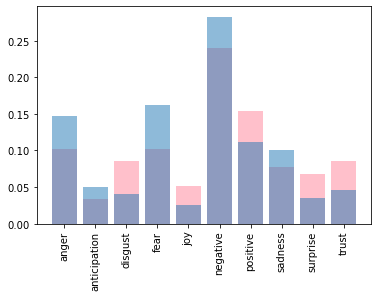

In [43]:
fem_emotions = {}
for word in emotions.emotion.unique():
    fem_emotions[word] = 0
mal_emotions = {}
for word in emotions.emotion.unique():
    mal_emotions[word] = 0
    
for word in most_female.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        fem_emotions[emotion] += 1
for word in least_female.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        mal_emotions[emotion] += 1

male_sum = sum(list(mal_emotions.values()))
fem_sum = sum(list(fem_emotions.values()))

plt.bar(fem_emotions.keys(), np.array(list(fem_emotions.values()))/fem_sum, color='pink')
plt.bar(mal_emotions.keys(), np.array(list(mal_emotions.values()))/male_sum, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [44]:
senses = {}
for word in emotions.word.unique():
    senses[word] = emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist()
most_female.index.map(senses)

Index([                                ['fear', 'negative', 'surprise'],
                                                                    nan,
                                                                     [],
                                                                    nan,
                                                                    nan,
                                                                    nan,
                                                                    nan,
                                                                    nan,
                                                           ['negative'],
                                                                     [],
       ...
                                                  ['anger', 'negative'],
                                       ['anger', 'disgust', 'negative'],
                                                                    nan,
                                        

In [117]:
least_female.index.map(senses)

Index([['anger', 'disgust', 'negative'],                              nan,
                                    nan,            ['positive', 'trust'],
                ['disgust', 'negative'],                               [],
                                    nan,                              nan,
                                    nan,                              nan,
       ...
                                    nan,                              nan,
                                    nan,                               [],
       ['anger', 'disgust', 'negative'],                              nan,
                           ['positive'],                               [],
                                    nan,                              nan],
      dtype='object', length=200)

In [45]:
powag_raw = pd.read_csv("agency_power.csv")
powag_raw.head()

,verb,agency,power
0,abandons,agency_pos,power_agent
1,abolishes,agency_pos,power_agent
2,absorbs,agency_pos,power_agent
3,abuses,agency_pos,power_agent
4,accelerates,agency_pos,power_agent


In [46]:
import spacy
nlp = spacy.load("en_core_web_md")

powag_raw.verb = powag_raw.verb.map(lambda x: nlp(x)[0].lemma_)

In [47]:
powag = powag_raw.set_index('verb')

In [48]:
most_fem_c.merge(powag, right_index=True, left_index=True)[['agency', 'power']].value_counts()

agency        power      
agency_pos    power_agent    59
              power_equal    11
              power_theme     8
agency_equal  power_equal     5
              power_agent     4
agency_neg    power_equal     4
agency_equal  power_theme     3
dtype: int64

In [49]:
least_fem_c.merge(powag, right_index=True, left_index=True)[['agency', 'power']].value_counts()

agency        power      
agency_pos    power_agent    113
              power_equal     18
              power_theme     11
agency_equal  power_agent      8
              power_theme      3
agency_neg    power_agent      3
              power_equal      3
              power_theme      3
dtype: int64